<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/Extrapolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [34]:
#Make the dataset
#generating a NumPy array named X with shape (1000, 2).
#containing random values between -3 and 3
N = 1000
X = np.random.random( (N,2) ) * 6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

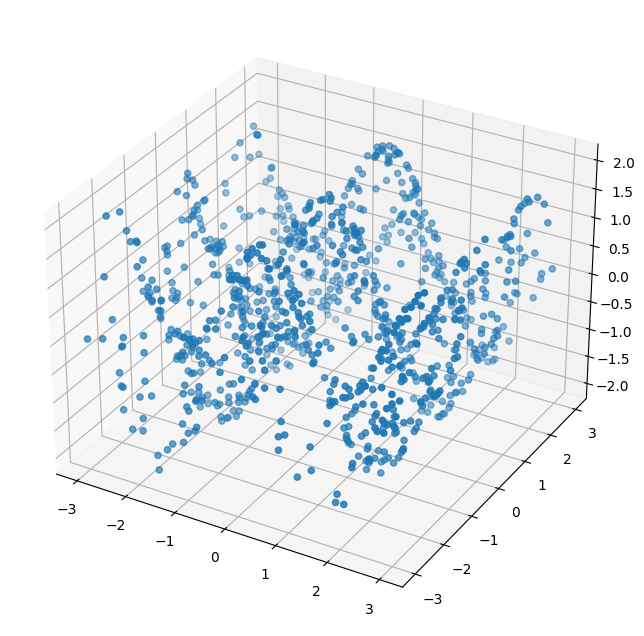

In [35]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],Y);

In [36]:
#SVR
model = SVR(C = 100.)
model.fit(X,Y);

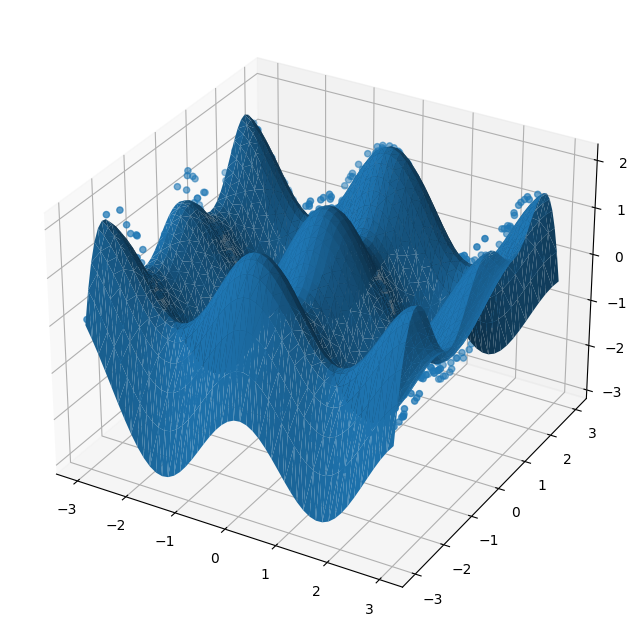

In [37]:
#Plot the prediction surface
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],Y)

#Surface plot
line = np.linspace(-3,3,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack(((xx.flatten(),yy.flatten()))).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth = 0.2,antialiased = True)

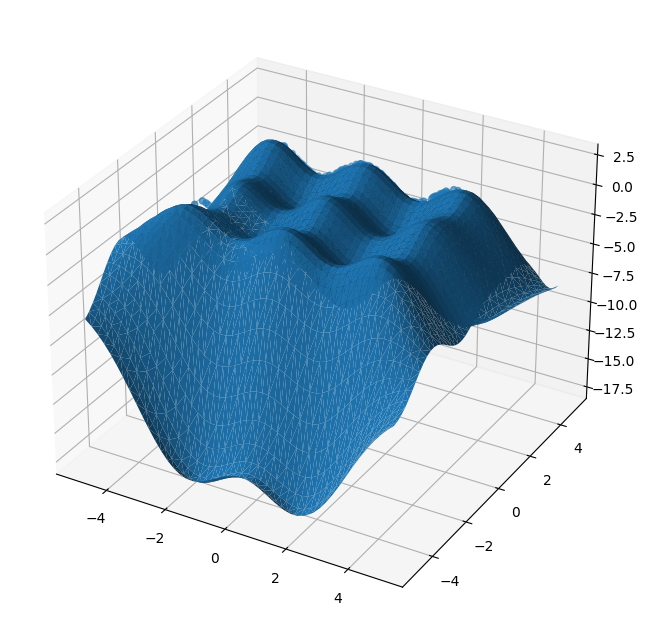

In [38]:
#Plot the prediction surface
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],Y)

#Surface plot
line = np.linspace(-5,5,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack(((xx.flatten(),yy.flatten()))).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth = 0.2,antialiased = True)

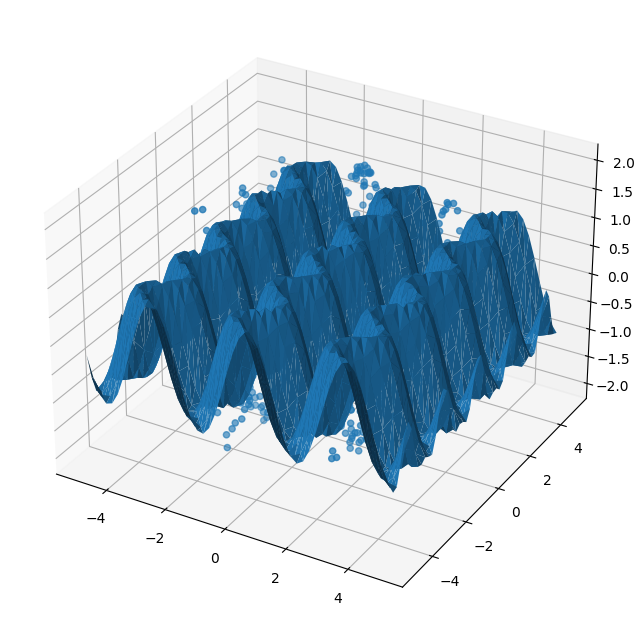

In [39]:
#Plot the prediction surface
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],Y)

#Surface plot
line = np.linspace(-5,5,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack(((xx.flatten(),yy.flatten()))).T
Yhat = np.cos(2*Xgrid[:,0] + np.cos(3*Xgrid[:,1]))
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth = 0.2,antialiased = True)

In [40]:
model = RandomForestRegressor()
model.fit(X,Y)

RandomForestRegressor()

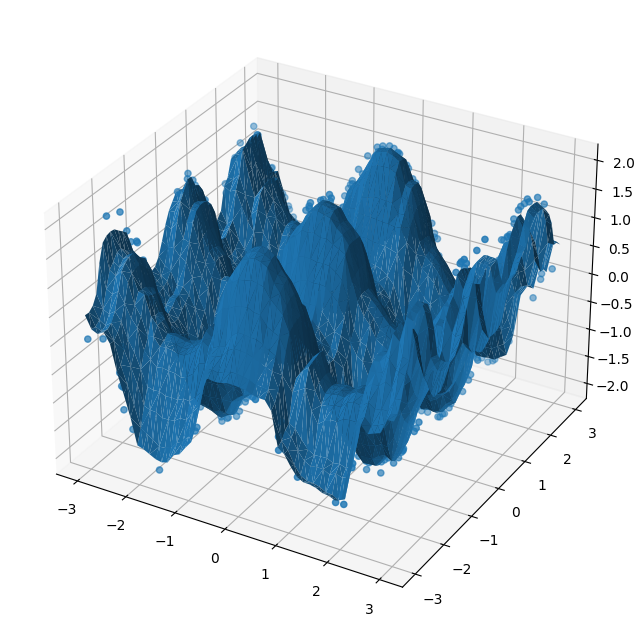

In [41]:
#Plot the prediction surface
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],Y)

#Surface plot
line = np.linspace(-3,3,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack(((xx.flatten(),yy.flatten()))).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth = 0.2,antialiased = True)

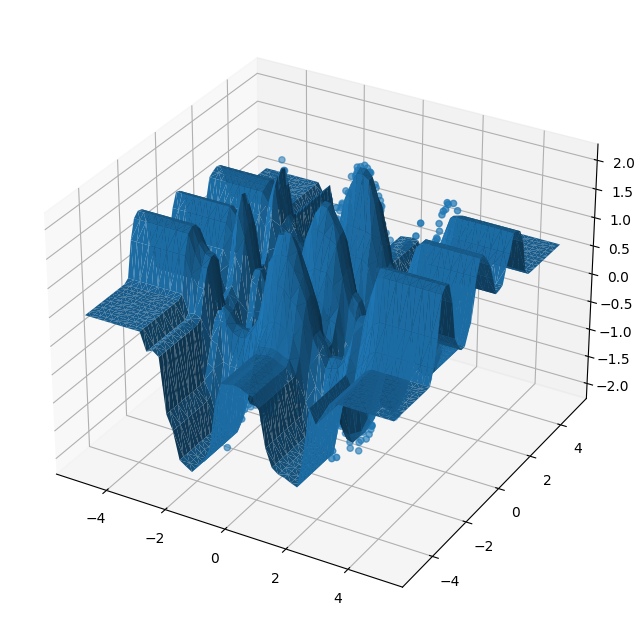

In [42]:
#Plot the prediction surface
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],Y)

#Surface plot
line = np.linspace(-5,5,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack(((xx.flatten(),yy.flatten()))).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth = 0.2,antialiased = True)

In [43]:
model = MLPRegressor(hidden_layer_sizes = 128,alpha = 0,learning_rate_init=0.01)
model.fit(X,Y);

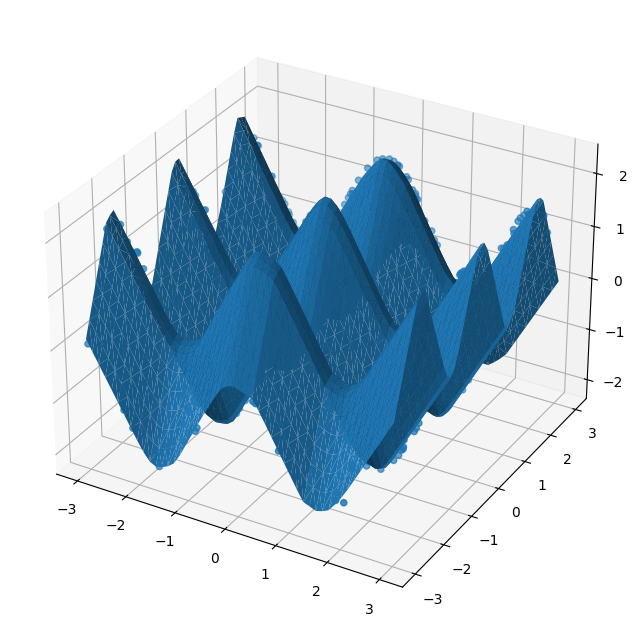

In [44]:
#Plot the prediction surface
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],Y)

#Surface plot
line = np.linspace(-3,3,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack(((xx.flatten(),yy.flatten()))).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth = 0.2,antialiased = True)

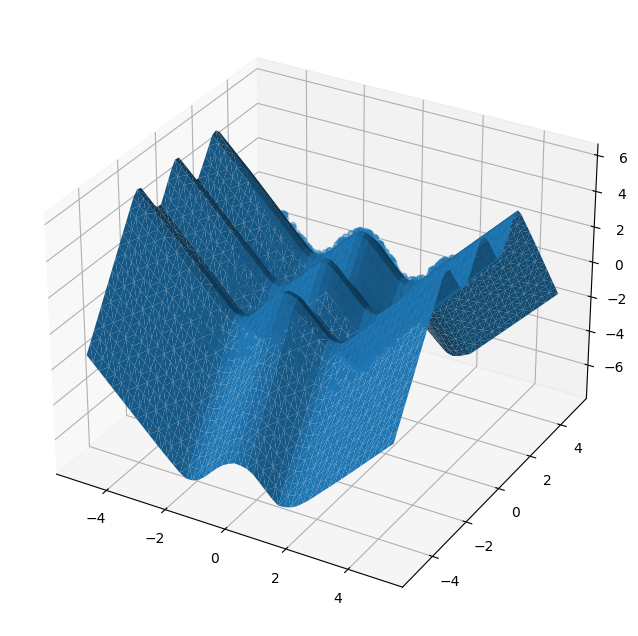

In [45]:
#Plot the prediction surface
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],Y)

#Surface plot
line = np.linspace(-5,5,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack(((xx.flatten(),yy.flatten()))).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth = 0.2,antialiased = True)

# **Stock Price**

In [46]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

File ‘SPY.csv’ already there; not retrieving.



In [47]:
import pandas as pd
df = pd.read_csv('SPY.csv',index_col = 'Date',parse_dates = True)

In [48]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [49]:
df.shape

(2263, 6)

In [51]:
train = df.iloc[:2000]['Close'].to_numpy()
test = df.iloc[2000:]['Close'].to_numpy()

In [55]:
XTrain = []
for t in range(len(train) - 1):
  x0 = train[t]
  x1 = train[t+1]
  XTrain.append((x0,x1))

XTest = []
for t in range(len(test) - 1):
  x0 = test[t]
  x1 = test[t+1]
  XTest.append((x0,x1))

In [56]:
XTrain = np.array(XTrain)
XTest = np.array(XTest)

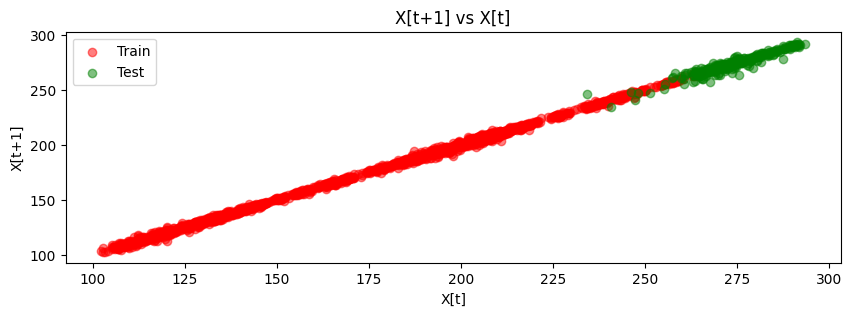

In [58]:
plt.figure(figsize = (10,3))
plt.xlabel("X[t]")
plt.ylabel("X[t+1]")
plt.title("X[t+1] vs X[t]")

plt.scatter(XTrain[:,0],XTrain[:,1],c='r',alpha = 0.5,label = 'Train')
plt.scatter(XTest[:,0],XTest[:,1],c = 'g',alpha = 0.5,label = 'Test')
plt.legend();